# Day 3 Machine Learning in Python - exercises with answers

## Exercise 1

#### Question 1 
##### Import the required packages to perform K-nearest neighbours.

#### Answer:


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# New today - we will introduce it when we use it.
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics


#### Question 2 
##### Set `main_dir` to the location of your `skillsoft-intro-to-machine-learning-in-python` folder.
##### Make `data_dir` from the `main_dir` and concatenate remainder of the path to data directory.

#### Answer:

In [2]:
from pathlib import Path
# Set `home_dir` to the root directory of your computer.
home_dir = Path.home()
# Set `main_dir` to the location of your `skillsoft-intro-to-machine-learning-in-python` folder.
main_dir = home_dir / "Desktop" / "skillsoft-intro-to-machine-learning-in-python"
# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = main_dir / "data"
# Create a plot directory to save our plots
plot_dir = main_dir / "plots"

#### Question 3 
##### Set the working directory to `data_dir`.
##### Check if the working directory is updated to `data_dir'.

#### Answer:

In [3]:
# Change the working directory.
os.chdir(data_dir)

# Check the working directory.
print(os.getcwd())

C:\Users\aashe\Desktop\skillsoft-intro-to-machine-learning-in-python\data


#### Question 4 
##### Load the cleaned dataset  `ex_cleaned_knn.csv` dataset that we saved in our previous module 
##### Save it as `chicago_cleaned`.

#### Answer:

In [4]:
chicago_cleaned = pd.read_csv("ex_cleaned_knn.csv")

# Look at the first five rows using .head().
chicago_cleaned.head()

,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_25_without_diploma,percent_dependent,per_capita_income,hardship_index,income
0,7.7,23.6,8.7,18.2,27.5,23939,39.0,False
1,7.8,17.2,8.8,20.8,38.5,23040,46.0,False
2,3.8,24.0,8.9,11.8,22.2,35787,20.0,True
3,3.4,10.9,8.2,13.4,25.5,37524,17.0,True
4,0.3,7.5,5.2,4.5,26.2,57123,6.0,True


#### Question 5
###### Once you ensure that all variables are numeric and that the target variable is Boolean, scale the variables using `scale()`.
###### When using `scale()`, remember that you first have to split your predictors from your target.
###### Label your scaled data `ex_X_scaled` (predictors) and `ex_y` (target).
###### Display the first five records in `ex_X_scaled.`

In [5]:
# Split the data into X and y - y is categorical, so it can't scale.
ex_X = chicago_cleaned.drop('income', axis = 1)
ex_y = np.array(chicago_cleaned['income'])

# Scale X.
ex_X_scaled = scale(ex_X)
print(ex_X_scaled[0:5])

[[ 0.76455091  0.16341619 -0.89126115 -0.18256997 -1.13545603 -0.10981094
  -0.37098756]
 [ 0.79205781 -0.39879857 -0.87784062  0.04020494  0.38438995 -0.16935257
  -0.12381538]
 [-0.3082184   0.19855461 -0.86442008 -0.73093897 -1.86774546  0.6748935
  -1.04188347]
 [-0.41824602 -0.95222873 -0.95836383 -0.59384672 -1.41179167  0.78993668
  -1.1478144 ]
 [-1.27096009 -1.25090533 -1.36097987 -1.35642237 -1.3150742   2.08799731
  -1.53622783]]


#### Question 6
###### Split the scaled data into train and test, use a 70 train - 30 test split. 
###### Name your train `ex_X_train` and `ex_y_train` and your test as `ex_X_test` and `ex_y_test`.
###### Don't forget to set the seed as `np.random.seed(2)`.



#### Answer:

In [6]:
# Set the seed.
np.random.seed(2)

# Split into train and test data.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X_scaled, 
                                                                ex_y, 
                                                                test_size = 0.3) 

#### Question 7
###### Now, for cross-validation, use a CV of 5 on the `ex_knn` model.
###### Save the scores as `ex_cv_scores` and print.
###### Find the mean of the 5 cv scores, store this as `ex_mean_cv`.

#### Answer:

In [7]:
# Train model with CV of 5.
ex_knn = KNeighborsClassifier(n_neighbors = 5)
ex_cv_scores = cross_val_score(ex_knn, ex_X_scaled, ex_y, cv = 5)

In [8]:
# Average the accuracy scores of all 5 iterations.
ex_mean = np.mean(ex_cv_scores)
ex_mean

0.8333333333333334

## Exercise 2

#### Question 1
###### Create a parameter grid so that we can optimize our parameters for the model.
###### `ex_k_range` should be a list with k values ranging from 1-31.
###### `ex_param_grid` should be a dictionary that consists of key = parameter name i.e `n_neighbors` and values = list of k values that should be searched, for that parameter i.e `ex_k_range`.
###### Instantiate the grid using the original model `ex_knn`. Use `GridSearchCV` with a 10 fold cv and scoring = accuracy.

#### Answer:

In [9]:
# Define the parameter values that should be searched.
ex_k_range = list(range(1, 31))

# Create a parameter grid.
ex_param_grid = dict(n_neighbors = ex_k_range)
print(ex_param_grid)

# Instantiate the grid using our original model - knn with k = 3.
ex_grid = GridSearchCV(ex_knn, ex_param_grid, cv = 10, scoring = 'accuracy')

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


#### Question 2
###### Fit the grid with data. View the complete results.
###### Create a list of the mean scores, using `ex_grid.cv_results_`. Name the list `ex_grid_mean_scores`.


#### Answer:

In [10]:
# Fit the grid with data.
ex_grid.fit(ex_X_scaled, ex_y)

# View complete results.
print(ex_grid.cv_results_['mean_test_score'])

[0.85897436 0.8974359  0.85897436 0.8974359  0.85897436 0.85897436
 0.88461538 0.88461538 0.91025641 0.92307692 0.91025641 0.88461538
 0.91025641 0.88461538 0.91025641 0.88461538 0.8974359  0.88461538
 0.8974359  0.88461538 0.91025641 0.8974359  0.91025641 0.91025641
 0.91025641 0.92307692 0.93589744 0.91025641 0.92307692 0.91025641]


C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
# List of the mean scores.
ex_grid_mean_scores = [result for result in ex_grid.cv_results_['mean_test_score']]

#### Question 3
###### Plot your grid search results (grid_mean_scores) so that you can discover optimal `k` visually.
###### What would optimal k be from just looking at this graph?


#### Answer:

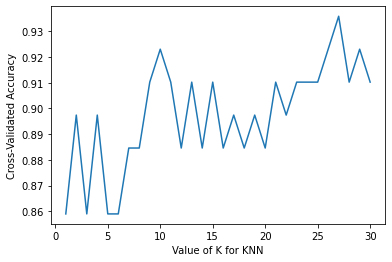

In [12]:
plt.plot(ex_k_range, ex_grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

- Optimal k is hard to define from this graph because of the ups and down. It could be at 3, 10, 27.

#### Question 4
###### Define the best parameters as found through grid search.
###### Define the best score and the dictionary containing the best parameters.
###### Then, print out the best model from the best parameters (`best_estimator_`)

#### Answer:

In [13]:
# Single best score achieved across all params (k).
print(ex_grid.best_score_)
ex_grid_score = ex_grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(ex_grid.best_params_)

# Actual model object fit with those best parameters.
# Show default parameters that we did not specify.
print(ex_grid.best_estimator_)

0.9358974358974359
{'n_neighbors': 27}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')


#### Question 5
###### Add the final, optimized model to the saved pickle file `ex_model_final.sav` that we created in our previous module
###### Pickle the dataframe so that you can add new classification methods to it in the next classes.

#### Answer:

In [14]:
ex_model_final = pickle.load(open("ex_model_final.sav","rb" ))

In [15]:
# Save final grid search model.
ex_model_final = ex_model_final.append({'metrics' : "accuracy" , 
                                        'values' : round(ex_grid_score, 4),
                                        'model':'knn_GridSearchCV' } , 
                                         ignore_index=True)
print(ex_model_final)

    metrics  values             model
0  accuracy  0.8333             knn_5
1  accuracy  0.9359  knn_GridSearchCV


In [16]:
# Pickle `ex_model_final` dataframe.
pickle.dump(ex_model_final, open("ex_model_final.sav","wb" ))